In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_listings.csv')

In [3]:
df.drop(['id'],axis=1,inplace=True)

In [4]:
df.head()

,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,...,property_type_Serviced apartment,property_type_Townhouse,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,60,0,1.0,1.0,1,0,1,2,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,100,0,8.0,8.0,1,1,0,4,1.0,1.0,...,0,0,1,0,0,0,0,1,1,0
2,60,0,5.0,5.0,1,1,0,2,1.0,0.0,...,0,0,0,0,0,0,0,1,0,1
3,100,0,4.0,4.0,1,1,1,2,1.0,1.0,...,0,0,1,0,0,0,0,1,0,1
4,100,0,1.0,1.0,1,1,1,2,1.0,1.0,...,0,0,1,0,0,0,1,0,0,1


In [29]:
x = df.columns

In [30]:
for i in range(0,len(x)):
    print(i,x[i])

0 host_response_rate
1 host_is_superhost
2 host_listings_count
3 host_total_listings_count
4 host_has_profile_pic
5 host_identity_verified
6 is_location_exact
7 accommodates
8 bathrooms
9 bedrooms
10 beds
11 price
12 security_deposit
13 cleaning_fee
14 guests_included
15 extra_people
16 minimum_nights
17 maximum_nights
18 minimum_minimum_nights
19 maximum_minimum_nights
20 minimum_maximum_nights
21 maximum_maximum_nights
22 minimum_nights_avg_ntm
23 maximum_nights_avg_ntm
24 availability_30
25 availability_60
26 availability_90
27 availability_365
28 number_of_reviews
29 number_of_reviews_ltm
30 review_scores_rating
31 review_scores_accuracy
32 review_scores_cleanliness
33 review_scores_checkin
34 review_scores_communication
35 review_scores_location
36 review_scores_value
37 instant_bookable
38 require_guest_profile_picture
39 require_guest_phone_verification
40 calculated_host_listings_count
41 calculated_host_listings_count_entire_homes
42 calculated_host_listings_count_private_room

In [6]:
zip_data = pd.read_csv('Zip_MedianValuePerSqft_AllHomes.csv',encoding='latin-1')

In [12]:
num_cols = ['host_total_listings_count',
'accommodates',
'bathrooms',
'bedrooms',
'beds',
 'price',
'security_deposit',
 'cleaning_fee',
 'availability_60',
 'availability_90',
 'number_of_reviews',
    'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
 'host_verifications_count','num_amenities',
 'ndays_between_f_l_reviews','ndays_host']

In [13]:
num_cols

['host_total_listings_count',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'security_deposit',
 'cleaning_fee',
 'availability_60',
 'availability_90',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'host_verifications_count',
 'num_amenities',
 'ndays_between_f_l_reviews',
 'ndays_host']

In [14]:
num_df = df[num_cols]

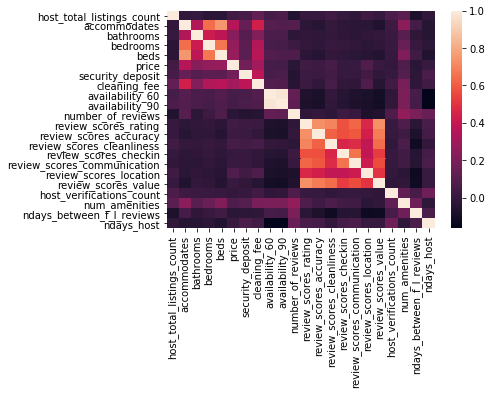

In [10]:
import seaborn as sns
corr = num_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [15]:
corr.loc['price',:]

host_total_listings_count      0.036223
accommodates                   0.358241
bathrooms                      0.233675
bedrooms                       0.263626
beds                           0.274983
price                          1.000000
security_deposit               0.172160
cleaning_fee                   0.302609
availability_60                0.051578
availability_90                0.045539
number_of_reviews             -0.032602
review_scores_rating           0.034612
review_scores_accuracy         0.021284
review_scores_cleanliness      0.053730
review_scores_checkin          0.004253
review_scores_communication    0.012279
review_scores_location         0.077670
review_scores_value            0.011780
host_verifications_count      -0.004979
num_amenities                  0.074852
ndays_between_f_l_reviews     -0.032027
ndays_host                     0.013105
Name: price, dtype: float64

In [17]:
df_array = df.values

In [18]:
df_array.shape

(50220, 79)

In [19]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(df_array)
df_scaled = scalar.transform(df_array)

#### Checking PCA

In [20]:
#importing PCA from sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
model = pca.fit(df_array)
df_reduced= pca.transform(df_array)


In [21]:
def plot_scaled_variance(pca):

    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Fraction of Explained Variance')
    ax.plot(pca.explained_variance_ratio_)
    
    return ax

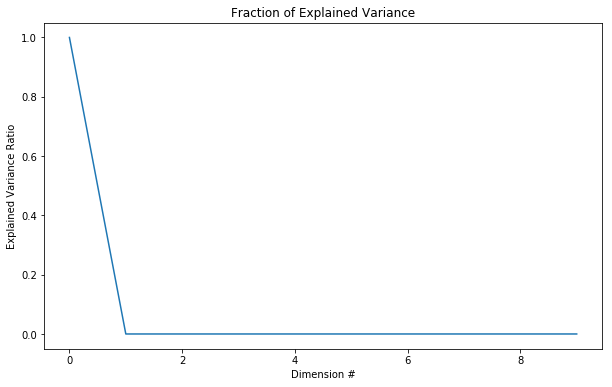

In [22]:
plot_scaled_variance(model)

#### KMeans

In [26]:
def plot_inertia(array, start=1, end=10):
    from sklearn.cluster import KMeans 
    interia = []
    for i in range(start,end+1):
        model = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
        fit = model.fit(array)
        interia.append(fit.inertia_)
        
        
    x_axis = range(start,end+1)
    
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.set_title('The elbow method')
    ax.set_ylabel('Inertia')
    ax.set_xlabel('Number of clusters')
    plt.plot(x_axis, interia)
    
    return ax

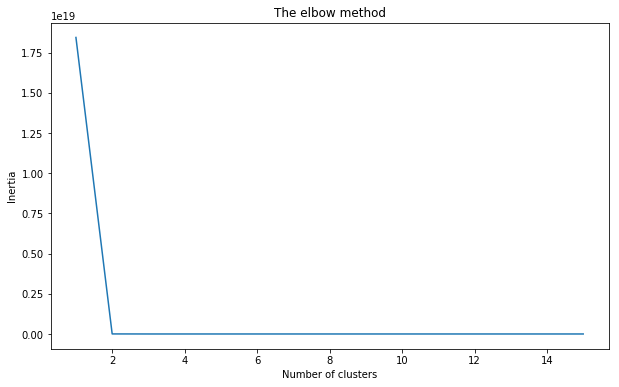

In [27]:
plot_inertia(df_reduced,start=1,end=15)

[0 1]


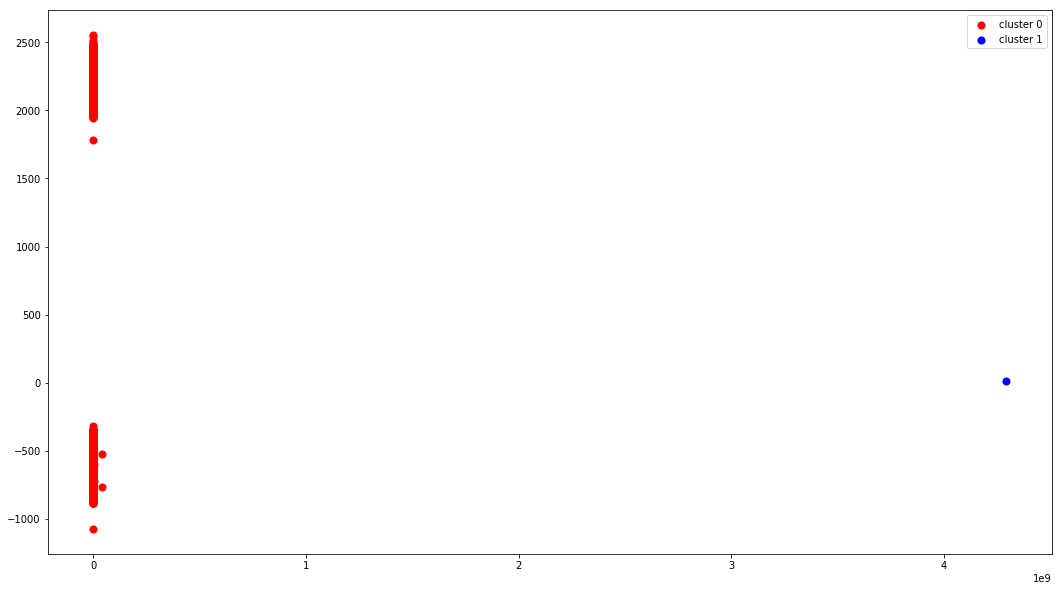

In [32]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=2,random_state=0)

model = kmeans.fit(df_reduced)

labels = model.fit_predict(df_reduced)


#Visualising the k-means results 

colors =['red','blue','green','yellow','orange','purple','pink','black','white','cyan','gray']
all_clusters = np.unique(labels)
print(all_clusters)

plt.figure(figsize=(18, 10)) 
for i in range(len(all_clusters)):
    plt.scatter(df_reduced[labels == all_clusters[i], 0], df_reduced[labels == all_clusters[i], 1], s = 50, 
            c = colors[i], label = ('cluster '+str(all_clusters[i])))
    plt.legend()

In [41]:
#K-Means on Scaled Values

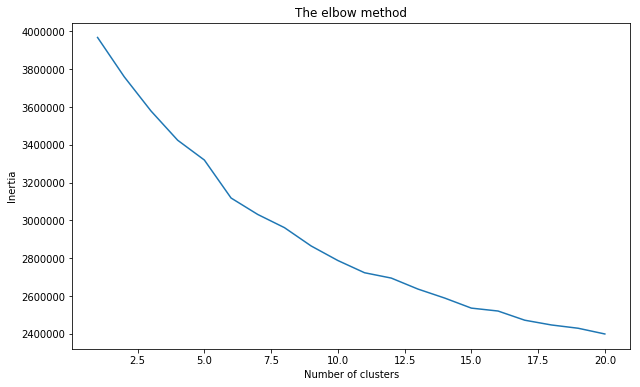

In [33]:
plot_inertia(df_scaled,start=1,end=20)

[0 1 2 3 4 5 6 7]


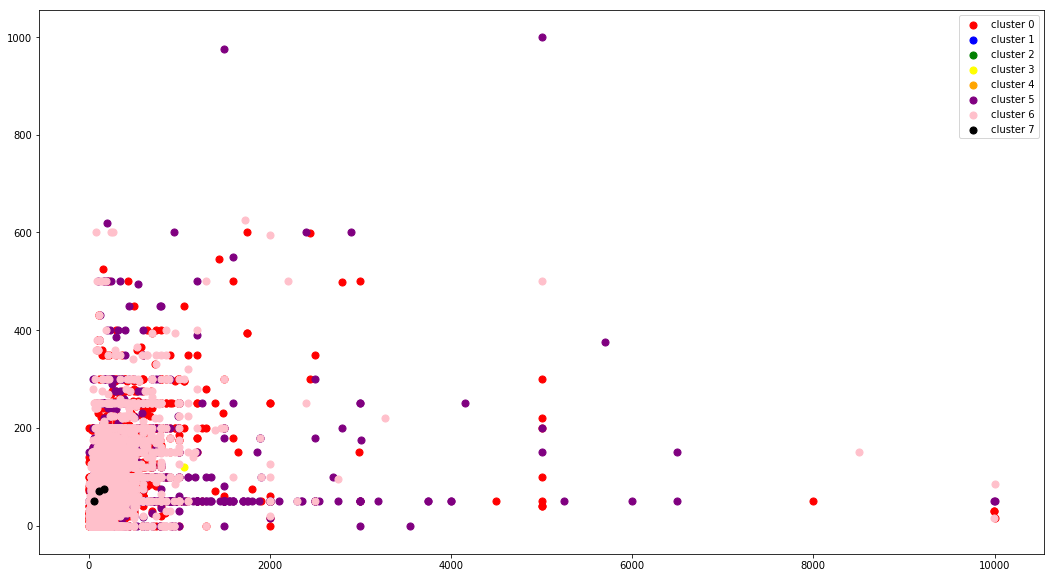

In [38]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=8,random_state=0)

model = kmeans.fit(df_array)

labels = model.fit_predict(df_array)

#Visualising the k-means results 

colors =['red','blue','green','yellow','orange','purple','pink','black','white','cyan','gray']
all_clusters = np.unique(labels)
print(all_clusters)

plt.figure(figsize=(18, 10)) 
for i in range(len(all_clusters)):
    plt.scatter(df_array[labels == all_clusters[i], 11], df_array[labels == all_clusters[i], 13], s = 50, 
            c = colors[i], label = ('cluster '+str(all_clusters[i])))
    plt.legend()

In [41]:
df['cluster'] = labels

In [46]:
df.groupby(['cluster']).mean()

,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,...,property_type_Serviced apartment,property_type_Townhouse,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
cluster,,,,,,,,,,,,,,,,,,,,,
0,96.269506,0.179404,7.736206,7.736206,0.998146,0.528389,0.805713,3.037134,1.151666,1.194237,...,0.011877,0.032523,0.433776,0.020195,0.001203,0.006264,0.004510,0.984716,0.244099,0.499273
1,100.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,100.000000,0.000000,1.000000,1.000000,1.000000,0.500000,0.500000,2.000000,1.000000,1.500000,...,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
3,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.500000,1.500000,1.500000,...,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
4,100.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,6.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5,95.702217,0.027513,33.446238,33.446238,0.997375,0.388198,0.791950,2.651079,1.172127,1.175870,...,0.029652,0.020513,0.472584,0.029360,0.002236,0.005153,0.003889,0.984445,0.126677,0.325685
6,96.362694,0.241713,3.604557,3.604557,0.998748,0.528643,0.851477,2.863545,1.124962,1.175063,...,0.009765,0.038758,0.452278,0.022083,0.001703,0.007962,0.007611,0.978718,0.275413,0.484076
7,89.000000,0.000000,1.333333,1.333333,0.666667,0.666667,1.000000,2.333333,1.000000,1.000000,...,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.666667,0.333333,0.333333


### tSNE 

(50220, 2)
[[-13.046939    -6.53124   ]
 [ 30.68475     34.06662   ]
 [-41.010426    -9.763053  ]
 [ 21.762348   -53.283188  ]
 [-28.403189   -34.55235   ]
 [ 32.91332     32.947323  ]
 [ 31.95263     33.92995   ]
 [-15.785631    46.587315  ]
 [ -0.30317444   3.6413434 ]]


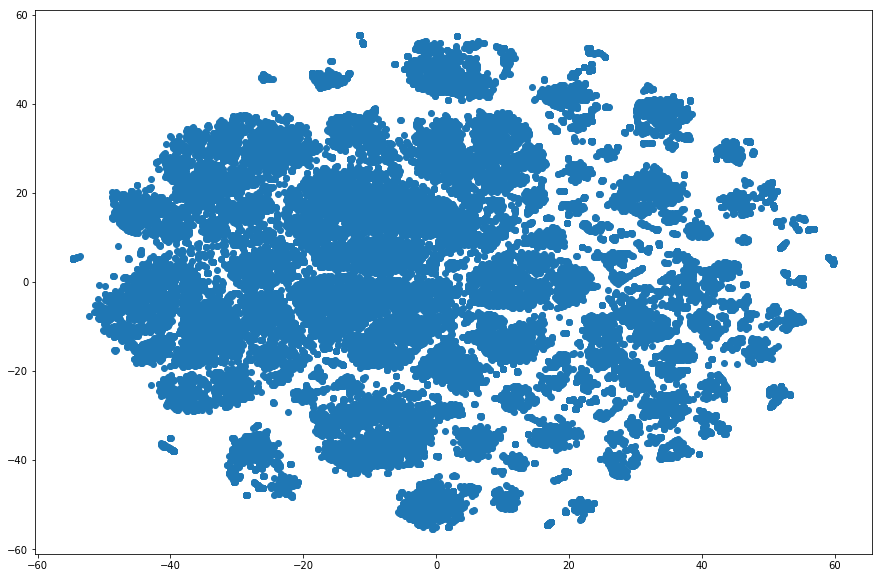

In [50]:
from sklearn.manifold import TSNE

model=TSNE(learning_rate=150)
Tsne_transformed=model.fit_transform(df_scaled)

print(Tsne_transformed.shape)

print(Tsne_transformed[1:10])

xs = Tsne_transformed[:,0]
ys = Tsne_transformed[:,1]

plt.figure(figsize=(15, 10)) 
plt.scatter(xs,ys)

In [51]:
#importing DBSCAN from sklearn
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 4.6, min_samples = 3)

model = dbscan.fit(df_scaled)

dsb_labels = model.fit_predict(df_scaled)


NameError: name 'Axes3D' is not defined

<Figure size 432x288 with 0 Axes>

In [55]:
#Visualising the DBSCAN results 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3d

groups = np.unique(dsb_labels)
colors =['red','blue','orange','green','yellow','purple','pink','black','white','cyan','gray']

fig = plt.figure()
ax = Axes3D(fig)
ax.grid=True
for i in range(len(groups)):
    ax.scatter( df_scaled[dsb_labels == groups[i], 7], 
                df_scaled[dsb_labels == groups[i], 8], 
                df_scaled[dsb_labels == groups[i], 9],
                c = colors[i],
                label = ('cluster '+str(groups[i])))
    plt.legend()
    

ImportError: cannot import name 'Axes3d' from 'mpl_toolkits.mplot3d' (/anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/__init__.py)

In [82]:
price_acc = df[['price','accommodates']]
price_acc = price_acc.values

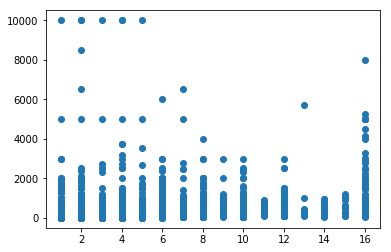

In [83]:
x = df['price']
y = df['accommodates']

plt.scatter(y,x)

In [84]:
from sklearn import svm

clf = svm.OneClassSVM(nu=0.10, kernel="rbf", gamma=0.1)
clf.fit(price_acc)
pred = clf.predict(price_acc)
normal = price_acc[pred == 1]
abnormal = price_acc[pred == -1]

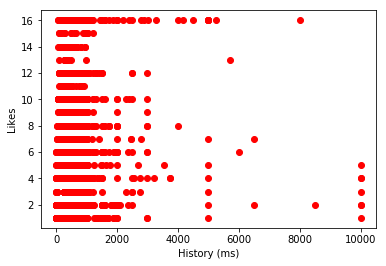

In [81]:
plt.figure()
#plt.plot(normal[:,0],normal[:,1],'bx')
plt.plot(abnormal[:,0],abnormal[:,1],'ro')
plt.xlabel('History (ms)')
plt.ylabel('Likes')
plt.show()